# Data Wrangling Project - WeRateDogs Twitter Data

### Project Motivation 
The project motivation is to wrangle WeRateDogs Twitter data to create interesting and trustworthy analyses and visualizations. The Twitter archive is great, but it only contains very basic tweet information. Additional gathering, then assessing and cleaning is required for analyses and visualizations.


In [40]:
# Load all the necessary libraries
import numpy as np
import pandas as pd
import requests
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Gather Data 

#### 1 . Collect and load data from the 'twitter-archive-enchanced.csv' file provided in the project into dataframe.

In [41]:
archive = pd.read_csv('twitter-archive-enhanced.csv')

In [42]:
archive.head(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


#### 2 . Download data from the link provided into a dataframe

In [43]:
# Using the the request library to import data from the given url
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

# Save the downloaded data to a file
with open('image-predictions.csv',mode='wb') as file:
    file.write(response.content)

# read data into a dataframe
predict = pd.read_csv('image-predictions.tsv',sep = '\t')

In [44]:
predict.head(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


#### Gather Data using Twitter API


In [127]:
consumer_key = 'xx'
consumer_secret = 'xx'
access_token = 'xx'
access_secret = 'xx'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))        
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start) 
print(fails_dict)

'consumer_key = \'zhBlUTVdqTN6RGRVWuVcZBjty\'\nconsumer_secret = \'riOYUMhnItHXmtTV36LcdAs8UM1RDsWEzp9bfNnvvS2xzqflNB\'\naccess_token = \'14557261-jOXTWeNfSenHkUubviMoRInQs0kpS9L53rKYfv3Kh\'\naccess_secret = \'ckPXpynu2D0DEdzJowg3E197ts1NIxmd7lrGJukcGPURI\'\n\nauth = OAuthHandler(consumer_key, consumer_secret)\nauth.set_access_token(access_token, access_secret)\n\napi = tweepy.API(auth, wait_on_rate_limit=True)\n\n# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:\n# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to\n# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv\n# NOTE TO REVIEWER: this student had mobile verification issues so the following\n# Twitter API code was sent to this student from a Udacity instructor\n# Tweet IDs for which to gather additional data via Twitter\'s API\ntweet_ids = df.tweet_id.values\nlen(tweet_ids)\n\n# Query Twitter\'s API for JSON data for each tweet ID in the Twitter archive\ncount = 0

In [8]:
## Read the twitter api jason data line by into a dataframe
tweets_data = []
with open('tweet_json.txt') as file:
    for line in file:
        try:
            tweet = json.loads(line)
            tweets_data.append(tweet)
        except:
            continue
tweetapi = pd.DataFrame(tweets_data, columns=list(tweets_data[0].keys()))
tweetapi.head(5)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,None,False,8494,38522,False,False,False,False,en
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,892177421306343426,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,None,False,6243,33027,False,False,False,False,en
2,Mon Jul 31 00:18:03 +0000 2017,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,None,False,4138,24855,False,False,False,False,en
3,Sun Jul 30 15:58:51 +0000 2017,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,None,False,8616,41909,False,False,False,False,en
4,Sat Jul 29 16:00:24 +0000 2017,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,None,False,9350,40056,False,False,False,False,en


## Asses the data gathered from 3 different sources

In [129]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [130]:
archive.tweet_id.isnull().sum()

0

In [131]:
archive.tweet_id.duplicated().sum()

0

In [132]:
archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [133]:
archive.name.value_counts()

None           745
a               55
Charlie         12
Cooper          11
Oliver          11
Lucy            11
Tucker          10
Lola            10
Penny           10
Winston          9
Bo               9
the              8
Sadie            8
Daisy            7
Bailey           7
Buddy            7
an               7
Toby             7
Oscar            6
Koda             6
Milo             6
Dave             6
Scout            6
Leo              6
Rusty            6
Stanley          6
Bella            6
Jax              6
Jack             6
Gus              5
              ... 
Zooey            1
Rorie            1
Maya             1
life             1
Pherb            1
Smiley           1
Bronte           1
Cheryl           1
Jazz             1
Josep            1
Hermione         1
Grady            1
Nico             1
Lolo             1
Roscoe           1
Pancake          1
Boston           1
Glenn            1
Tilly            1
Chef             1
Shakespeare      1
Hall        

In [134]:
archive['name'].str.extract('(^[a-z]\w{0,})', expand=False).value_counts()

a               55
the              8
an               7
very             5
one              4
quite            4
just             4
getting          2
actually         2
mad              2
not              2
life             1
all              1
such             1
officially       1
space            1
by               1
unacceptable     1
his              1
my               1
light            1
this             1
infuriating      1
incredibly       1
old              1
Name: name, dtype: int64

In [135]:
archive.in_reply_to_status_id.isnull().value_counts()

True     2278
False      78
Name: in_reply_to_status_id, dtype: int64

In [136]:
archive.rating_numerator.describe()

count    2356.000000
mean       13.126486
std        45.876648
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

In [137]:
archive.rating_denominator.describe()

count    2356.000000
mean       10.455433
std         6.745237
min         0.000000
25%        10.000000
50%        10.000000
75%        10.000000
max       170.000000
Name: rating_denominator, dtype: float64

In [138]:
arc_rate = archive.query('rating_numerator <15')
arc_rate.rating_numerator.value_counts()

12    558
11    464
10    461
13    351
9     158
8     102
7      55
14     54
5      37
6      32
3      19
4      17
1       9
2       9
0       2
Name: rating_numerator, dtype: int64

In [139]:
arc_rate = archive.query('rating_numerator >15')
arc_rate.rating_numerator.value_counts()

420     2
75      2
60      1
27      1
99      1
165     1
80      1
144     1
44      1
204     1
45      1
88      1
143     1
1776    1
17      1
50      1
26      1
84      1
182     1
20      1
24      1
121     1
666     1
960     1
Name: rating_numerator, dtype: int64

In [46]:
archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [47]:
arc_denom = archive.query('rating_denominator > 10')

In [54]:
arc_denom[['tweet_id','text','rating_denominator']]

,tweet_id,text,rating_denominator
342,832088576586297345,@docmisterio account started on 11/15/15,15
433,820690176645140481,The floofs have been released I repeat the flo...,70
784,775096608509886464,"RT @dog_rates: After so many requests, this is...",11
902,758467244762497024,Why does this never happen at my front door......,150
1068,740373189193256964,"After so many requests, this is Bretagne. She ...",11
1120,731156023742988288,Say hello to this unbelievably well behaved sq...,170
1165,722974582966214656,Happy 4/20 from the squad! 13/10 for all https...,20
1202,716439118184652801,This is Bluebert. He just saw that both #Final...,50
1228,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99...,90
1254,710658690886586372,Here's a brigade of puppers. All look very pre...,80


In [140]:
predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [141]:
predict.tweet_id.isnull().sum()

0

In [142]:
predict.tweet_id.duplicated().sum()

0

In [143]:
predict.jpg_url.isnull().sum()

0

In [144]:
predict.img_num.isnull().sum()

0

In [145]:
tweetapi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2342 entries, 0 to 2341
Data columns (total 27 columns):
created_at                       2342 non-null object
id                               2342 non-null int64
id_str                           2342 non-null object
full_text                        2342 non-null object
truncated                        2342 non-null bool
display_text_range               2342 non-null object
entities                         2342 non-null object
extended_entities                2067 non-null object
source                           2342 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null object
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 non-null object
in_reply_to_screen_name          78 non-null object
user                             2342 non-null object
geo                              0 non-null object
coordinates                      0 non-null

In [146]:
tweetapi.retweet_count.isnull().value_counts()

False    2342
Name: retweet_count, dtype: int64

In [147]:
tweetapi.favorite_count.isnull().value_counts()

False    2342
Name: favorite_count, dtype: int64

In [148]:
tweetapi.id.isnull().value_counts()

False    2342
Name: id, dtype: int64

### Visual and Programatic Assement Report
The gathered data was both visually(using google docs) and programtically assed. Below are some of the findings.

#### Quality Assement

#####  twitter-archived-enhanced data
<ul><li>The dataset contains a total of 2356 unique twitter id data.</li><li>
 
The columns in df dataframe in_reply_to_status_id , in_reply_to_user_id ,retweeted_status_id, retweeted_status_user_id,retweeted_status_timestamp , expanded_urls have missing values.</li><li>
The timestamp column datatype must to datetime instead of object.</li><li>
The null values in 'name', 'doggo', 'floofer', 'pupper','puppo' are represented as 'None'.</li><li>
The dog name columns consist (109 )values such as  'a', 'an','the' etc. These names could be a typo and does not look like a legit name.</li><li>
The source column in df dataframe consist of four values 'Twitter for iPhone','Vine - Make a Scene', 'Twitter Web Client', 'TweetDeck'. The links to these source are hard coded html links which are repetive of of no significance.</li><li>
The ratings_denominator column consist of values other than 10.</li><li>
The ratings_numerator columns contain both values less than 10 and some value greater than twenty. They also contain 3 and four digit ratings.</li>
</ul>


#####  image-predictions.csv data
<ul><li>
The dataset consists 2075 unique twitter image data. It is less than the twitter archive dataset.</li></ul>


##### twitter api data 
<ul><li>All the twitter id did not retrun data using Twitter api. There are 2342 rows in the dataset. The data is a subset of the main twitter data.</li>
<li>The id column name in the twitter api data is not consistent with the tweet_id column name in the other 2 dataset.</li><li>
There are column in the twitter api dataframe which are not required for this analysis and can be removed.</li></ul>

#### Tideness
<ul><li>The column doggo,floofer,pupper,puppo can be combind into one column</li>
<li>The column rating_denominator and rating_numerator can be condensed into one column.</li><li>
All 3 dataframe can be merged into for easy of analysis.
</li>
  

    

## Clean

In [95]:
### Make a copy of the current data.
df_arc = archive.copy()
df_img= predict.copy()
df_api = tweetapi.copy()

In [96]:
df_arc.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


In [97]:
df_img.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


In [98]:
df_api.head(2)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,None,False,8494,38522,False,False,False,False,en
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,892177421306343426,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,None,False,6243,33027,False,False,False,False,en


#### Define
Change timestamp datatype to datetime

#### Code

In [99]:
df_arc['timestamp'] = pd.to_datetime(df_arc['timestamp'])

#### Test

In [100]:
df_arc.dtypes

tweet_id                               int64
in_reply_to_status_id                float64
in_reply_to_user_id                  float64
timestamp                     datetime64[ns]
source                                object
text                                  object
retweeted_status_id                  float64
retweeted_status_user_id             float64
retweeted_status_timestamp            object
expanded_urls                         object
rating_numerator                       int64
rating_denominator                     int64
name                                  object
doggo                                 object
floofer                               object
pupper                                object
puppo                                 object
dtype: object

#### Define
The source column in df dataframe consist of four values 'Twitter for iPhone','Vine - Make a Scene', 'Twitter Web Client', 'TweetDeck'. The links to these source are hard coded html links which are repetive of of no significance.

#### Code

In [101]:
df_arc.source = df_arc.source.replace('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
                                                                          'Twitter for iphone')
df_arc.source = df_arc.source.replace('<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
                                                                          'Vine - Make a Scene')
df_arc.source = df_arc.source.replace('<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
                                                                           'Twitter Web Client')
df_arc.source = df_arc.source.replace('<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>',
                                                                           'TweetDeck')

#### Test

In [102]:
df_arc.source.value_counts()

Twitter for iphone     2221
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                11
Name: source, dtype: int64

#### Define
Remove 'None' values from the columns 'name', 'doggo', 'floofer', 'pupper','puppo' . Combine the dog stages into one column called dog_stage. Drop the individual dog stage columns.

#### Code

In [103]:
### Replace all the None values with null
df_arc.name = df_arc.name.replace('None','')
df_arc.doggo = df_arc.doggo.replace('None','')
df_arc.floofer = df_arc.floofer.replace('None','')
df_arc.pupper = df_arc.pupper.replace('None','')
df_arc.puppo = df_arc.puppo.replace('None','')

#### Test

In [104]:
df_arc.query('name == None')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [105]:
df_arc.query('doggo == None or floofer == None or pupper == None or puppo == None')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [106]:
### Create a new column for dog_stage

df_arc['dog_stage']=df_arc['doggo'].str.cat(df_arc['floofer']).str.cat(df_arc['pupper']).str.cat(df_arc['puppo'])


In [107]:
df_arc.dog_stage.value_counts()

                1976
pupper           245
doggo             83
puppo             29
doggopupper       12
floofer            9
doggopuppo         1
doggofloofer       1
Name: dog_stage, dtype: int64

In [108]:
## replace the dog stage with proper spacing
df_arc.dog_stage = df_arc.dog_stage.replace('doggopupper','doggo, pupper')
df_arc.dog_stage = df_arc.dog_stage.replace('doggopuppo','doggo, puppo')
df_arc.dog_stage = df_arc.dog_stage.replace('doggofloofer','doggo, floofer')


In [109]:
df_arc.dog_stage.value_counts()

                  1976
pupper             245
doggo               83
puppo               29
doggo, pupper       12
floofer              9
doggo, floofer       1
doggo, puppo         1
Name: dog_stage, dtype: int64

In [110]:
df_arc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 18 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dog_stage               

In [111]:
#Drop old dog stage columns, doggo, pupper, floofer, puppo
df_arc=df_arc.drop(['doggo','floofer','pupper','puppo'],axis=1)

In [112]:
df_arc.dtypes

tweet_id                               int64
in_reply_to_status_id                float64
in_reply_to_user_id                  float64
timestamp                     datetime64[ns]
source                                object
text                                  object
retweeted_status_id                  float64
retweeted_status_user_id             float64
retweeted_status_timestamp            object
expanded_urls                         object
rating_numerator                       int64
rating_denominator                     int64
name                                  object
dog_stage                             object
dtype: object

#### Define 
Since the analysis is only based on original tweets. Remove tweets where in_reply_to_stauts_id , retweet_status_id which is not null. Also drop the columns from the dataframe


#### Code

In [113]:
#Remove tweets that are not null in_reply_to_stauts_id , retweet_status_id
df_arc=df_arc[df_arc.in_reply_to_user_id.isnull()]
df_arc=df_arc[df_arc.retweeted_status_id.isnull()]

In [114]:
df_arc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                      2097 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null datetime64[ns]
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null int64
name                          2097 non-null object
dog_stage                     2097 non-null object
dtypes: datetime64[ns](1), float64(4), int64(3), object(6)
memory usage: 245.7+ KB


In [115]:
#Delete retweet columns
df_arc=df_arc.drop(['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp',
                                'in_reply_to_user_id','in_reply_to_status_id',],axis=1)

#### Test

In [116]:
df_arc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null datetime64[ns]
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
dog_stage             2097 non-null object
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 163.8+ KB


####  Define 
Extract numerators less than 20 for analysis. The numerators greater than 20 have only 1 or 2 twitter id hence we ignore for those analysis. The column rating_denominator and rating_numerator can be condensed into one column. Assume the rating_denominator to be 10.(based on the project overview)

#### Code

In [120]:
df_arc['rating_numerator'].value_counts().sort_index()

0         1
1         5
2         9
3        19
4        16
5        34
6        32
7        52
8        98
9       153
10      436
11      413
12      486
13      287
14       38
24        1
26        1
27        1
44        1
45        1
50        1
60        1
75        1
80        1
84        1
88        1
99        1
121       1
144       1
165       1
204       1
420       1
1776      1
Name: rating_numerator, dtype: int64

In [59]:

df_arc= df_arc.query('rating_numerator >= 10')

In [60]:
df_arc.rating_numerator.value_counts()

Series([], Name: rating_numerator, dtype: int64)

In [121]:
df_arc['rating'] = df_arc.rating_numerator/df_arc.rating_denominator

In [122]:
df_arc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 10 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null datetime64[ns]
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
dog_stage             2097 non-null object
rating                2097 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(3), object(5)
memory usage: 180.2+ KB


In [123]:
df_arc.rating.describe()

count    2097.000000
mean        1.169281
std         3.965932
min         0.000000
25%         1.000000
50%         1.100000
75%         1.200000
max       177.600000
Name: rating, dtype: float64

In [124]:
df_arc.rating.value_counts()

1.200000      490
1.000000      438
1.100000      418
1.300000      287
0.900000      153
0.800000       98
0.700000       51
1.400000       38
0.500000       35
0.600000       32
0.300000       19
0.400000       15
0.200000       10
0.100000        4
2.700000        1
3.428571        1
0.636364        1
177.600000      1
2.600000        1
42.000000       1
7.500000        1
0.000000        1
0.818182        1
Name: rating, dtype: int64

In [127]:
# For analysis are these tweets really having such high rating?
df_arc.query('rating > 10.0')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,rating
979,749981277374128128,2016-07-04 15:00:45,TweetDeck,This is Atticus. He's quite simply America af....,https://twitter.com/dog_rates/status/749981277...,1776,10,Atticus,,177.6
2074,670842764863651840,2015-11-29 05:52:33,Twitter for iphone,After so many requests... here you go.\n\nGood...,https://twitter.com/dog_rates/status/670842764...,420,10,,,42.0


In [128]:
df_arc=df_arc.drop(['rating_numerator','rating_denominator'],axis=1)

#### Test

In [129]:
df_arc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 8 columns):
tweet_id         2097 non-null int64
timestamp        2097 non-null datetime64[ns]
source           2097 non-null object
text             2097 non-null object
expanded_urls    2094 non-null object
name             2097 non-null object
dog_stage        2097 non-null object
rating           2097 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 147.4+ KB


#### Define
The dog name columns consist (109 )values such as  'a', 'an','the' etc. These names could be a typo and does not look like a legit name.

#### Code

In [130]:
#### Extract all the lowercase names
df_list = df_arc['name'].str.extract('(^[a-z]\w{0,})', expand=False)

In [131]:
### Remove all the lowercase name from the names column
df_list
for i in df_list:
    #print (df_list)
    df_arc.name = df_arc.name.replace(i,'')

#### Test

In [132]:
df_arc['name'].value_counts()

            707
Charlie      11
Lucy         11
Oliver       10
Cooper       10
Penny         9
Tucker        9
Winston       8
Sadie         8
Lola          8
Daisy         7
Toby          7
Bella         6
Oscar         6
Bailey        6
Stanley       6
Bo            6
Jax           6
Koda          6
Buddy         5
Chester       5
Scout         5
Leo           5
Rusty         5
Louis         5
Bentley       5
Milo          5
Dave          5
George        4
Scooter       4
           ... 
Clarq         1
Darla         1
Stuart        1
Jackie        1
Monster       1
Mattie        1
Mookie        1
Peanut        1
Leonidas      1
Stephan       1
Aja           1
Kody          1
Terrenth      1
Lilli         1
Maisey        1
Paull         1
Dallas        1
Lassie        1
Chase         1
Mack          1
Comet         1
Ralphy        1
Zuzu          1
Grizz         1
Carll         1
Ruffles       1
Duddles       1
Cal           1
Combo         1
Anna          1
Name: name, Length: 930,

#### Define 
Rename id colmn to tweet_id for uniformity.

#### Code

In [133]:
df_img.rename(columns={'id':'tweet_id'}, inplace=True)


#### Test

In [134]:
df_img.head(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


#### Define
Extract only the column of interest and create a new dataframe for the tweetapi

In [135]:
df_api.head(5)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,None,False,8494,38522,False,False,False,False,en
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,892177421306343426,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,None,False,6243,33027,False,False,False,False,en
2,Mon Jul 31 00:18:03 +0000 2017,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,None,False,4138,24855,False,False,False,False,en
3,Sun Jul 30 15:58:51 +0000 2017,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,None,False,8616,41909,False,False,False,False,en
4,Sat Jul 29 16:00:24 +0000 2017,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,None,False,9350,40056,False,False,False,False,en


In [136]:
df_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2342 entries, 0 to 2341
Data columns (total 27 columns):
created_at                       2342 non-null object
id                               2342 non-null int64
id_str                           2342 non-null object
full_text                        2342 non-null object
truncated                        2342 non-null bool
display_text_range               2342 non-null object
entities                         2342 non-null object
extended_entities                2067 non-null object
source                           2342 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null object
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 non-null object
in_reply_to_screen_name          78 non-null object
user                             2342 non-null object
geo                              0 non-null object
coordinates                      0 non-null

#### Code

In [137]:
#Extract the columns of interest
df_new = df_api[['id', 'retweet_count', 'favorite_count']]

#### Test

In [138]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2342 entries, 0 to 2341
Data columns (total 3 columns):
id                2342 non-null int64
retweet_count     2342 non-null int64
favorite_count    2342 non-null int64
dtypes: int64(3)
memory usage: 55.0 KB


#### Define

Rename is id column to tweet_id

#### Code

In [139]:
df_new.rename(columns={'id':'tweet_id'}, inplace=True)


/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3027: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


#### Test

In [140]:
df_new.head(10)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8494,38522
1,892177421306343426,6243,33027
2,891815181378084864,4138,24855
3,891689557279858688,8616,41909
4,891327558926688256,9350,40056
5,891087950875897856,3100,20086
6,890971913173991426,2059,11761
7,890729181411237888,18826,65073
8,890609185150312448,4252,27625
9,890240255349198849,7375,31700


#### Define
Merge all the dataframe into one dataframe based on their tweet_id and save the data into a csv file .

In [141]:
tweet_merged = pd.merge(pd.merge(df_arc,df_img,on='tweet_id'),df_new,on='tweet_id')

In [142]:
tweet_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1970 entries, 0 to 1969
Data columns (total 21 columns):
tweet_id          1970 non-null int64
timestamp         1970 non-null datetime64[ns]
source            1970 non-null object
text              1970 non-null object
expanded_urls     1970 non-null object
name              1970 non-null object
dog_stage         1970 non-null object
rating            1970 non-null float64
jpg_url           1970 non-null object
img_num           1970 non-null int64
p1                1970 non-null object
p1_conf           1970 non-null float64
p1_dog            1970 non-null bool
p2                1970 non-null object
p2_conf           1970 non-null float64
p2_dog            1970 non-null bool
p3                1970 non-null object
p3_conf           1970 non-null float64
p3_dog            1970 non-null bool
retweet_count     1970 non-null int64
favorite_count    1970 non-null int64
dtypes: bool(3), datetime64[ns](1), float64(4), int64(4), object(9)
memo

In [143]:
# Write the contents of merdeg dataframe into a csv file 
tweet_merged.to_csv('tweet_merged.csv',index=False)

### Analyse the merged data 

In [144]:
#### Load data from teh csv file
df = pd.read_csv('tweet_merged.csv')

In [145]:
df.head(5)

,tweet_id,timestamp,source,text,expanded_urls,name,dog_stage,rating,jpg_url,img_num,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56,Twitter for iphone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,NaN,1.3,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,8494,38522
1,892177421306343426,2017-08-01 00:17:27,Twitter for iphone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,NaN,1.3,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,6243,33027
2,891815181378084864,2017-07-31 00:18:03,Twitter for iphone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,NaN,1.2,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,4138,24855
3,891689557279858688,2017-07-30 15:58:51,Twitter for iphone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,NaN,1.3,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,8616,41909
4,891327558926688256,2017-07-29 16:00:24,Twitter for iphone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,NaN,1.2,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9350,40056


In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1970 entries, 0 to 1969
Data columns (total 21 columns):
tweet_id          1970 non-null int64
timestamp         1970 non-null object
source            1970 non-null object
text              1970 non-null object
expanded_urls     1970 non-null object
name              1348 non-null object
dog_stage         303 non-null object
rating            1970 non-null float64
jpg_url           1970 non-null object
img_num           1970 non-null int64
p1                1970 non-null object
p1_conf           1970 non-null float64
p1_dog            1970 non-null bool
p2                1970 non-null object
p2_conf           1970 non-null float64
p2_dog            1970 non-null bool
p3                1970 non-null object
p3_conf           1970 non-null float64
p3_dog            1970 non-null bool
retweet_count     1970 non-null int64
favorite_count    1970 non-null int64
dtypes: bool(3), float64(4), int64(4), object(10)
memory usage: 282.9+ KB


In [147]:
df.rating.describe()

count    1970.000000
mean        1.169484
std         4.091673
min         0.000000
25%         1.000000
50%         1.100000
75%         1.200000
max       177.600000
Name: rating, dtype: float64

In [154]:
df.rating = df.rating.round(2)

In [155]:
df.rating.value_counts()

1.20      449
1.00      419
1.10      397
1.30      253
0.90      150
0.80       95
0.70       51
0.50       34
1.40       33
0.60       32
0.30       19
0.40       15
0.20       10
0.10        4
177.60      1
0.82        1
2.60        1
3.43        1
0.64        1
42.00       1
7.50        1
0.00        1
2.70        1
Name: rating, dtype: int64

In [156]:
df.query('rating > 10')

,tweet_id,timestamp,source,text,expanded_urls,name,dog_stage,rating,jpg_url,img_num,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
721,749981277374128128,2016-07-04 15:00:45,TweetDeck,This is Atticus. He's quite simply America af....,https://twitter.com/dog_rates/status/749981277...,Atticus,NaN,177.6,https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg,1,...,0.533941,False,sunglasses,0.080822,False,sunglass,0.050776,False,2685,5470
1695,670842764863651840,2015-11-29 05:52:33,Twitter for iphone,After so many requests... here you go.\n\nGood...,https://twitter.com/dog_rates/status/670842764...,NaN,NaN,42.0,https://pbs.twimg.com/media/CU9P717W4AAOlKx.jpg,1,...,0.096063,False,accordion,0.094075,False,drumstick,0.061113,False,9183,25309


Some ratings are very high like 42, 177. On Further investigation indeeed these dogs had a very high rating.

In [163]:
df_rate = df.rating.value_counts(normalize=True) \
           .mul(100).round(1)
df_rate


1.20      22.8
1.00      21.3
1.10      20.2
1.30      12.8
0.90       7.6
0.80       4.8
0.70       2.6
0.50       1.7
1.40       1.7
0.60       1.6
0.30       1.0
0.40       0.8
0.20       0.5
0.10       0.2
177.60     0.1
0.82       0.1
2.60       0.1
3.43       0.1
0.64       0.1
42.00      0.1
7.50       0.1
0.00       0.1
2.70       0.1
Name: rating, dtype: float64

Text(0.5,0,'Twitter Rating')

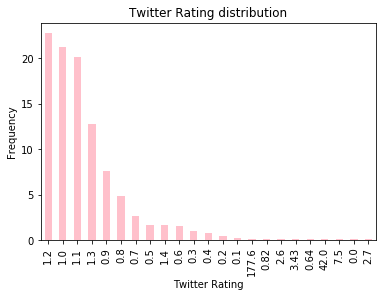

In [164]:
df_rate.plot(kind='bar',color='pink',title = 'Twitter Rating distribution')
plt.ylabel('Frequency')
plt.xlabel('Twitter Rating')

The graph above shows the rating 22.8% of the we rate dogs data set have a max rating 1.2 (12/10). 

In [165]:
# where does the tweets with the most rating have their sources
df_source = df.query('rating > 1.0')
df_source.head(2)


,tweet_id,timestamp,source,text,expanded_urls,name,dog_stage,rating,jpg_url,img_num,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56,Twitter for iphone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,NaN,1.3,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,8494,38522
1,892177421306343426,2017-08-01 00:17:27,Twitter for iphone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,NaN,1.3,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,6243,33027


In [166]:
df_source.source.value_counts()


Twitter for iphone    1115
Twitter Web Client      15
TweetDeck                8
Name: source, dtype: int64

Majority tweets with rating higher than 1.0(10/10) orginate from iphone. Follwed by a small number from web client.

In [167]:
df_img = df_source[['rating','img_num']]
df_img.head(4)

,rating,img_num
0,1.3,1
1,1.3,1
2,1.2,1
3,1.3,1


In [168]:
df_img_group= df_img.groupby('img_num')['rating'].value_counts()
df_img_group

img_num  rating
1        1.20      363
         1.10      336
         1.30      195
         1.40       20
         2.60        1
         2.70        1
         3.43        1
         7.50        1
         42.00       1
         177.60      1
2        1.20       61
         1.10       49
         1.30       31
         1.40        3
3        1.20       19
         1.30       14
         1.10        7
         1.40        6
4        1.30       13
         1.20        6
         1.10        5
         1.40        4
Name: rating, dtype: int64

From the above stats we can infer greateer number of images does not necessarily mean more rating. There is 360 tweets with only one image and a rating of 1.2 (12/10).


In [169]:
df_source.dog_stage.value_counts()

pupper            116
doggo              54
puppo              18
doggo, pupper       6
floofer             6
doggo, floofer      1
doggo, puppo        1
Name: dog_stage, dtype: int64

In [170]:
df_p1= df.query('p1_dog == True and rating > 1.0')
df_p1.describe()

,tweet_id,rating,img_num,p1_conf,p2_conf,p3_conf,retweet_count,favorite_count
count,9.200000e+02,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000
mean,7.673198e+17,1.205467,1.273913,0.635562,0.140212,0.060025,3655.227174,12672.173913
std,7.030725e+16,0.244160,0.650583,0.256289,0.103400,0.053706,5728.405707,15045.101714
min,6.661022e+17,1.100000,1.000000,0.090341,0.000023,0.000003,12.000000,80.000000
25%,6.985619e+17,1.100000,1.000000,0.423621,0.052722,0.011940,1070.750000,3415.750000
50%,7.698179e+17,1.200000,1.000000,0.661423,0.126184,0.046543,2196.500000,8238.500000
75%,8.270190e+17,1.300000,1.000000,0.873080,0.206606,0.095272,4117.250000,16750.000000
max,8.921774e+17,7.500000,4.000000,0.999953,0.467678,0.271042,76649.000000,142280.000000


In [171]:
df_p1

,tweet_id,timestamp,source,text,expanded_urls,name,dog_stage,rating,jpg_url,img_num,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
1,892177421306343426,2017-08-01 00:17:27,Twitter for iphone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,NaN,1.3,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,6243,33027
2,891815181378084864,2017-07-31 00:18:03,Twitter for iphone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,NaN,1.2,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,4138,24855
4,891327558926688256,2017-07-29 16:00:24,Twitter for iphone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,NaN,1.2,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9350,40056
5,891087950875897856,2017-07-29 00:08:17,Twitter for iphone,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,NaN,NaN,1.3,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,...,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False,3100,20086
6,890971913173991426,2017-07-28 16:27:12,Twitter for iphone,Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",Jax,NaN,1.3,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1,...,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False,2059,11761
7,890729181411237888,2017-07-28 00:22:40,Twitter for iphone,When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,NaN,NaN,1.3,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2,...,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True,18826,65073
8,890609185150312448,2017-07-27 16:25:51,Twitter for iphone,This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,Zoey,NaN,1.3,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1,...,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True,4252,27625
9,890240255349198849,2017-07-26 15:59:51,Twitter for iphone,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,Cassie,doggo,1.4,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1,...,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True,7375,31700
10,890006608113172480,2017-07-26 00:31:25,Twitter for iphone,This is Koda. He is a South Australian decksha...,https://twitter.com/dog_rates/status/890006608...,Koda,NaN,1.3,https://pbs.twimg.com/media/DFnwSY4WAAAMliS.jpg,1,...,0.957979,True,Pomeranian,0.013884,True,chow,0.008167,True,7302,30484
11,889880896479866881,2017-07-25 16:11:53,Twitter for iphone,This is Bruno. He is a service shark. Only get...,https://twitter.com/dog_rates/status/889880896...,Bruno,NaN,1.3,https://pbs.twimg.com/media/DFl99B1WsAITKsg.jpg,1,...,0.377417,True,Labrador_retriever,0.151317,True,muzzle,0.082981,False,4953,27599


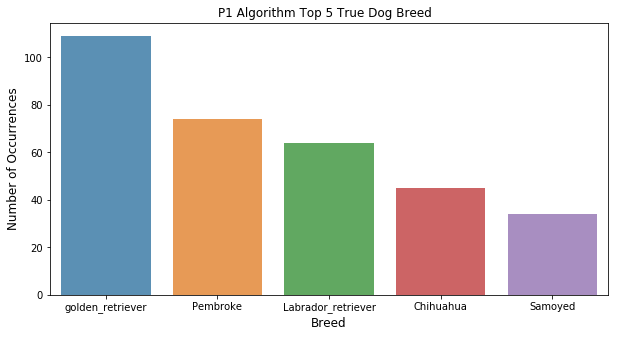

In [172]:
p1_count  = df_p1['p1'].value_counts()
p1_count= p1_count[:5,]
plt.figure(figsize=(10,5))
sns.barplot(p1_count.index, p1_count.values, alpha=0.8)
plt.title('P1 Algorithm Top 5 True Dog Breed  ')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Breed', fontsize=12)
plt.show()

In [173]:
p1_count


golden_retriever      109
Pembroke               74
Labrador_retriever     64
Chihuahua              45
Samoyed                34
Name: p1, dtype: int64

In [174]:
df.query('p2_dog == True').describe()

,tweet_id,rating,img_num,p1_conf,p2_conf,p3_conf,retweet_count,favorite_count
count,1.479000e+03,1479.000000,1479.000000,1479.000000,1479.000000,1479.000000,1479.000000,1479.000000
mean,7.409273e+17,1.087147,1.220419,0.617124,0.140102,0.061097,2754.909398,9281.433401
std,6.856687e+16,0.196027,0.577044,0.261735,0.103870,0.052624,4567.872873,12931.267910
min,6.660209e+17,0.000000,1.000000,0.044333,0.000010,0.000001,12.000000,80.000000
25%,6.779698e+17,1.000000,1.000000,0.394497,0.054268,0.014877,621.500000,2168.000000
50%,7.156808e+17,1.100000,1.000000,0.618316,0.124030,0.049033,1414.000000,4432.000000
75%,7.960558e+17,1.200000,1.000000,0.858754,0.203257,0.094779,3185.500000,11747.000000
max,8.921774e+17,3.430000,4.000000,0.999984,0.467678,0.273419,62543.000000,142280.000000


In [175]:
df_p2= df.query('p2_dog == True and rating > 1.0')
df_p2.describe()

,tweet_id,rating,img_num,p1_conf,p2_conf,p3_conf,retweet_count,favorite_count
count,9.190000e+02,919.000000,919.000000,919.000000,919.000000,919.000000,919.000000,919.000000
mean,7.678989e+17,1.196551,1.289445,0.641390,0.139292,0.058872,3711.357998,12834.167573
std,7.008355e+16,0.128261,0.659279,0.256493,0.104499,0.053388,5392.936603,14894.672508
min,6.661022e+17,1.100000,1.000000,0.100499,0.000010,0.000001,12.000000,80.000000
25%,6.994242e+17,1.100000,1.000000,0.427118,0.049942,0.011630,1079.500000,3463.000000
50%,7.721030e+17,1.200000,1.000000,0.668613,0.122356,0.045448,2237.000000,8513.000000
75%,8.266628e+17,1.200000,1.000000,0.876511,0.206374,0.094240,4209.500000,16883.500000
max,8.921774e+17,3.430000,4.000000,0.999984,0.467678,0.271042,62543.000000,142280.000000


In [176]:
df_p2.p2.value_counts().describe()

count    105.000000
mean       8.752381
std       12.007835
min        1.000000
25%        2.000000
50%        5.000000
75%       10.000000
max       79.000000
Name: p2, dtype: float64

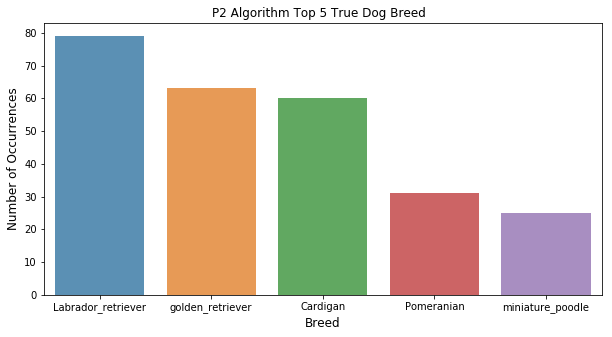

In [177]:
p2_count  = df_p2['p2'].value_counts()
p2_count= p2_count[:5,]
plt.figure(figsize=(10,5))
sns.barplot(p2_count.index, p2_count.values, alpha=0.8)
plt.title('P2 Algorithm Top 5 True Dog Breed  ')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Breed', fontsize=12)
plt.show()

In [178]:
p2_count

Labrador_retriever    79
golden_retriever      63
Cardigan              60
Pomeranian            31
miniature_poodle      25
Name: p2, dtype: int64

In [179]:

df_p3= df.query('p3_dog == True and rating > 1.0')
df_p3.describe()

,tweet_id,rating,img_num,p1_conf,p2_conf,p3_conf,retweet_count,favorite_count
count,8.870000e+02,887.000000,887.000000,887.000000,887.000000,887.000000,887.000000,887.000000
mean,7.674214e+17,1.205896,1.294250,0.635658,0.139413,0.059944,3709.387824,12701.403608
std,6.978564e+16,0.248204,0.668715,0.255006,0.103276,0.053092,5974.021773,15305.416838
min,6.661022e+17,1.100000,1.000000,0.090341,0.000010,0.000001,12.000000,80.000000
25%,6.992216e+17,1.100000,1.000000,0.427118,0.052572,0.013197,1057.000000,3398.500000
50%,7.721931e+17,1.200000,1.000000,0.663047,0.123141,0.045837,2186.000000,8229.000000
75%,8.259725e+17,1.250000,1.000000,0.869579,0.201576,0.095099,4121.000000,16734.500000
max,8.921774e+17,7.500000,4.000000,0.999984,0.467678,0.271042,76649.000000,142280.000000


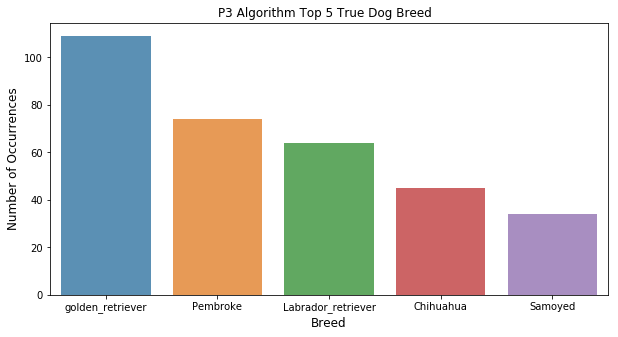

In [180]:
p3_count  = df_p3['p3'].value_counts()
p3_count= p1_count[:5,]
plt.figure(figsize=(10,5))
sns.barplot(p3_count.index, p3_count.values, alpha=0.8)
plt.title('P3 Algorithm Top 5 True Dog Breed  ')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Breed', fontsize=12)
plt.show()

In [181]:
df.retweet_count.describe()


count     1970.000000
mean      2713.370051
std       4739.204685
min         12.000000
25%        603.000000
50%       1313.000000
75%       3107.250000
max      76649.000000
Name: retweet_count, dtype: float64

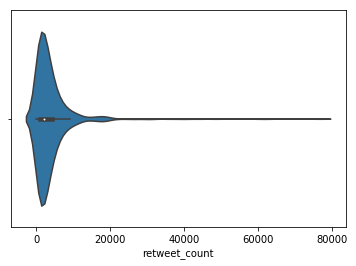

In [182]:
sns.violinplot(x="retweet_count", data=df_source);

In [183]:
df.favorite_count.describe()

count      1970.000000
mean       8862.858883
std       12705.583320
min          80.000000
25%        1927.000000
50%        4019.000000
75%       11111.000000
max      142280.000000
Name: favorite_count, dtype: float64

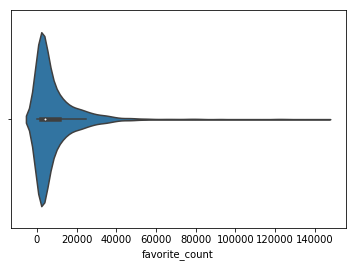

In [184]:
sns.violinplot(x="favorite_count", data=df);

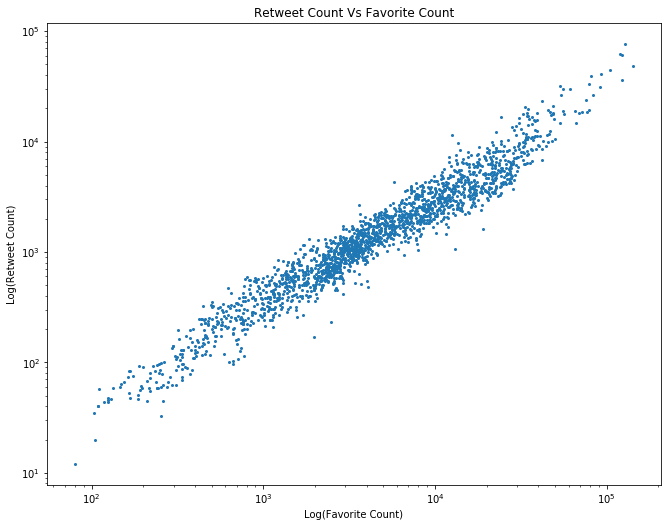

In [185]:
plt.figure(1, figsize = (11, 8.5))
plt.plot(df.favorite_count, df.retweet_count, marker='o', linestyle='', ms=2 )
plt.title('Retweet Count Vs Favorite Count')
plt.xlabel('Log(Favorite Count)')
plt.ylabel('Log(Retweet Count)')
plt.xscale('log')
plt.yscale('log')
plt.show()

In [187]:
df['retweet_count'].corr(df['favorite_count'])
#highly correlated

0.9221570849213788